#Recommendation system:
Content/ User specific recommendation system: Recommending movies based on the users past searches or past movies watched, focusing on the genres - Recommended for you on Youtube, or you may also like section, etc

Popularity based recommendation system: Recommends movies based on most watched overall - Popular now on shopping sites or trending on YT

Collaborative recommendation system: Recommends movies based on what people who watched the same movie watched - People also bought, frequently bought together on shopping sites (Clustering)

Importing the libraries

In [47]:
import matplotlib.pyplot as plt


In [1]:
import numpy as np
import pandas as pd
import difflib #in case the user makes an error while typing the movie name
from sklearn.feature_extraction.text import TfidfVectorizer #textual to numerical value (feature vectors)
from sklearn.metrics.pairwise import cosine_similarity #suggesting movies that are similar to the one added by the user (content based recommendation system)

In [4]:
# loading the data from the csv file to apandas dataframe
movies = pd.read_csv('/content/movies.csv')

In [10]:
column = movies.columns
for column in  column:
  print(column)

#use popularity, revenue, cast, director, crew, vote average when working on a popularity based recommendation system

index
budget
genres
homepage
id
keywords
original_language
original_title
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
director


In [5]:
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
movies.shape

(4803, 24)

In [17]:
# for our specific content based recommendation system we will take these columns:
chosen_features = ['genres','keywords','tagline','cast','director', 'overview']
print(chosen_features)

['genres', 'keywords', 'tagline', 'cast', 'director', 'overview']


In [23]:
for feature in chosen_features:
  movies[feature] = movies[feature].fillna(' ')

In [25]:
movies_data_features = movies['genres']+' '+movies['keywords']+' '+movies['tagline']+' '+movies['cast']+' '+movies['director']+' '+ movies['overview']

In [26]:
print(movies_data_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [28]:
# converting the text data to feature vectors

vector = TfidfVectorizer()

In [29]:
feature_vector = vector.fit_transform(movies_data_features)

#Cosine Similarity

A metric used to measure how similar two non-zero vectors are. Often used in fields such as NLP or ML tasks like document similarity analysis, recommendation systems, and clustering.

In [32]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vector)

In [33]:
print(similarity)

[[1.         0.05083168 0.0332947  ... 0.02749812 0.0304889  0.0072518 ]
 [0.05083168 1.         0.04356836 ... 0.05077045 0.03100979 0.01521198]
 [0.0332947  0.04356836 1.         ... 0.02646984 0.04751623 0.01372603]
 ...
 [0.02749812 0.05077045 0.02646984 ... 1.         0.03481447 0.03546821]
 [0.0304889  0.03100979 0.04751623 ... 0.03481447 1.         0.03098945]
 [0.0072518  0.01521198 0.01372603 ... 0.03546821 0.03098945 1.        ]]


In [34]:
print(similarity.shape)

(4803, 4803)


Getting the movie name from the user

In [73]:

fav_movie = input('Whats your favorite movie:' )

Whats your favorite movie:avengers


In [74]:
titles_list = movies['title'].tolist()
print(titles_list)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [75]:

new_match = difflib.get_close_matches(fav_movie, titles_list)
print(new_match)

['The Avengers', 'Savages', 'Swingers']


In [76]:
movie_match = new_match[0]
print(movie_match)

The Avengers


In [77]:

movie_index = movies[movies.title == movie_match]['index'].values[0]
print(movie_index)

16


In [78]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[movie_index]))
print(similarity_score)

[(0, 0.04270511084643852), (1, 0.06224849736436751), (2, 0.038497022076105974), (3, 0.03866029496208938), (4, 0.07911855483427592), (5, 0.028219968789126127), (6, 0.03223768203133271), (7, 0.44023537999611306), (8, 0.05694612067285467), (9, 0.0900244307215416), (10, 0.07257687378091392), (11, 0.024244462485105166), (12, 0.021581747144618836), (13, 0.030140555006309223), (14, 0.12280045566128427), (15, 0.04412560274546139), (16, 1.0000000000000002), (17, 0.0621768846858582), (18, 0.09406180183659207), (19, 0.046170896553890076), (20, 0.07491686150195936), (21, 0.05098295245244174), (22, 0.02999812856331277), (23, 0.04039353374924208), (24, 0.03960799005044994), (25, 0.029469554253520047), (26, 0.20395712302219832), (27, 0.07126731298189382), (28, 0.05668291840266033), (29, 0.06763120531181949), (30, 0.08646957595640709), (31, 0.13988291470369982), (32, 0.04708294714925445), (33, 0.13338190411264159), (34, 0.014097601041070489), (35, 0.03929614190478607), (36, 0.05639013876033423), (37, 

In [79]:
similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(similar_movies)

[(16, 1.0000000000000002), (7, 0.44023537999611306), (85, 0.22030391002885588), (79, 0.21875024386891997), (26, 0.20395712302219832), (511, 0.1822759407731296), (174, 0.17132075087923182), (126, 0.165340198355461), (64, 0.16420929069328924), (169, 0.1463207117759176), (46, 0.14225094695565857), (182, 0.1401795608196723), (31, 0.13988291470369982), (33, 0.13338190411264159), (68, 0.1320883910974722), (101, 0.12943581971790338), (129, 0.12929891610324507), (203, 0.12580808444072306), (14, 0.12280045566128427), (38, 0.12056450312255527), (1720, 0.11700903976544032), (870, 0.11672626627773836), (1294, 0.11388770846814351), (94, 0.11336879003815323), (1230, 0.11256437839498352), (215, 0.11113767691337564), (788, 0.10986510020201289), (1892, 0.1091073911294834), (782, 0.10737096085522715), (713, 0.10679787508044816), (4401, 0.10525669069412166), (1569, 0.10467168495538937), (242, 0.1031335794946852), (4759, 0.10017500295475637), (2874, 0.09897325494600732), (1286, 0.09838660260231001), (256,

In [80]:
# print the name of similar movies based on the index

print('Recommended for you : \n')

i = 1

for movie in similar_movies:
  index = movie[0]
  title_from_index = movies[movies.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Recommended for you : 

1 . The Avengers
2 . Avengers: Age of Ultron
3 . Captain America: The Winter Soldier
4 . Iron Man 2
5 . Captain America: Civil War
6 . X-Men
7 . The Incredible Hulk
8 . Thor: The Dark World
9 . X-Men: Apocalypse
10 . Captain America: The First Avenger
11 . X-Men: Days of Future Past
12 . Ant-Man
13 . Iron Man 3
14 . X-Men: The Last Stand
15 . Iron Man
16 . X-Men: First Class
17 . Thor
18 . X2
19 . Man of Steel
20 . The Amazing Spider-Man 2
21 . Kick-Ass
22 . Superman II
23 . Serenity
24 . Guardians of the Galaxy
25 . The Shadow
26 . Fantastic 4: Rise of the Silver Surfer
27 . Deadpool
28 . The Losers
29 . The Spirit


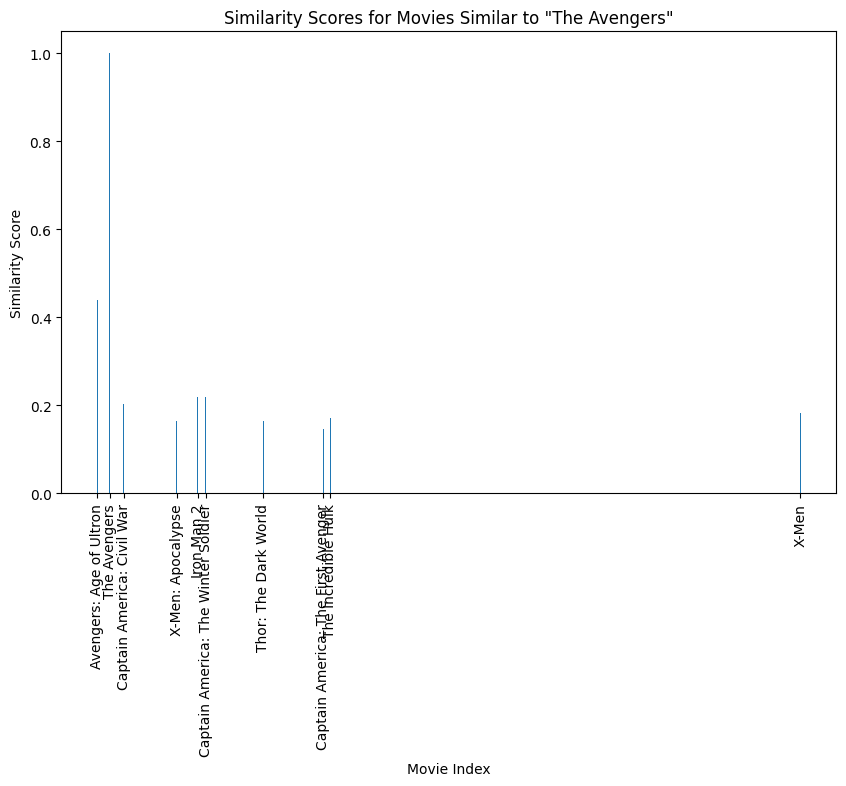

In [81]:
N = 10
top_similar_movies = similar_movies[:N]

movie_indices, scores = zip(*top_similar_movies)

plt.figure(figsize=(10, 6))
plt.bar(movie_indices, scores)
plt.xlabel('Movie Index')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores for Movies Similar to "{}"'.format(titles_list[movie_index]))
plt.xticks(movie_indices, [titles_list[i] for i in movie_indices], rotation=90)
plt.show()

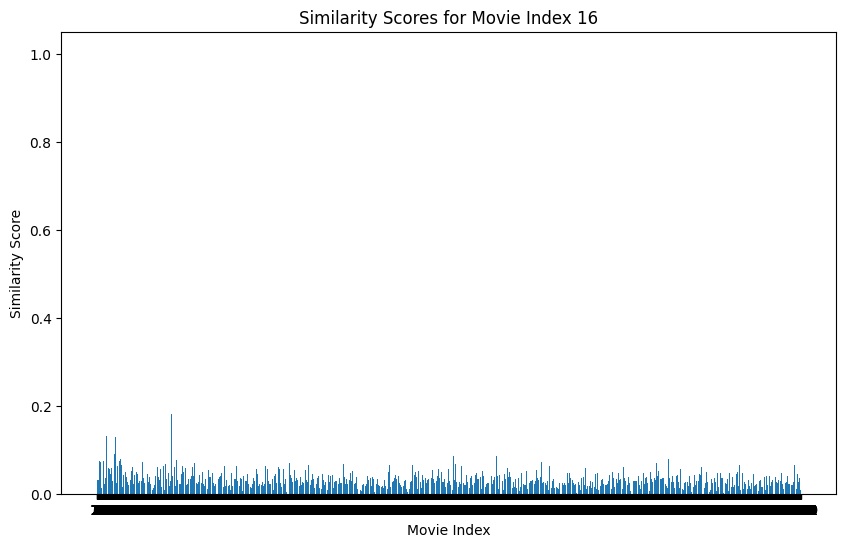

In [82]:
movie_indices, scores = zip(*similarity_score)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(movie_indices, scores)
plt.xlabel('Movie Index')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores for Movie Index {}'.format(movie_index))
plt.xticks(movie_indices)  # Set x-axis ticks to movie indices
plt.show()
